**PROJECT TEAM ID**: PTID-CDS-DEC-23-1712  
**PROJECT CODE**   : PRCP-1027-Skin Disorder  
**PROJECT NAME**   : Detecting the type of skin disorder

# Business Case

* In this database, we aim to enhance the accuracy of diagnosing erythemato-squamous diseases in dermatology by addressing the challenges posed by shared clinical and histopathological features among diseases. This will enable a more delicate and efficient approach to patient evaluation and treatment decision-making.
* The database boasts 34 properties that facilitate the precise evaluation of erythemato-squamous disorders, transcending the constraints of ocular inspection. Dermatological research and advancements benefit from comprehensive data encompassing 12 clinical and 22 histological aspects. Additionally, the inclusion of family history, age, and a graded feature scale enhances the early identification of illnesses.
* With accurate clinical and histological data, Optimising Biopsy Decision-Making aids in selecting when to do biopsies, avoiding needless invasive procedures, and decreasing unnecessary invasive treatments.
* Facilitating Decision-Making: A 0 to 3 scale provides a quantifiable framework for evaluating skin diseases, with 0 indicating absence and 3 representing the maximum. Intermediate values (1 and 2) denote relative degrees, ensuring consistency in assessment.
* The skin disorder detection system not only aids in minimizing misdiagnosis and unnecessary treatments, resulting in cost savings for patients and healthcare providers, but its implementation can also drive overall cost savings and resource optimization in healthcare settings. Furthermore, this initiative contributes to medical research and data analysis, fostering advancements in the field of dermatology.
* The skin disorder detection system ensures privacy compliance by removing patient names and identification numbers, protecting sensitive information in healthcare research. Simultaneously, it contributes to improved patient care and outcomes through enhanced diagnosis accuracy and early identification suggestions, reinforcing its positive impact on overall healthcare delivery.





## Domain Analysis

**Erythemato-squamous diseases**
 - It is a term used to describe a group of skin conditions that have similar features. The word "erythema" refers to redness of the skin, and "squamous" refers to the scaling or flaky appearance. So, these diseases typically cause redness and scaling on the skin.   
 
**The skin disorders mentioned in the dataset are:**  
 
**Psoriasis:**
 - Psoriasis is a skin condition where the skin cells multiply faster than usual, leading to red, itchy, and sometimes scaly patches. It's a chronic condition that can come and go.  
 
**Seborrheic Dermatitis:**
 - This is a common skin condition causing redness and flaky skin, often on the scalp (dandruff), face, or other parts of the body. It can be itchy and may cause discomfort.  
 
**Lichen Planus:**
 - Lichen planus is a rash that can affect the skin, nails, or mucous membranes inside the mouth. It usually appears as shiny, flat-topped bumps that may be itchy.  
 
**Pityriasis Rosea:**
 - Pityriasis rosea is a mild skin rash that often starts with a larger, pinkish patch ("herald patch") followed by smaller, scaly patches. It's usually not serious and tends to go away on its own.  
 
**Chronic Dermatitis:**
 - Chronic dermatitis refers to persistent inflammation of the skin. It can manifest as red, itchy, and swollen skin, and it may be caused by various factors, including allergies or irritants.  
 
**Pityriasis Rubra Pilaris:**
 - Pityriasis rubra pilaris is a rare skin disorder that results in red-orange scaling patches and tiny bumps. It often starts on the elbows and knees and may spread to other parts of the body.



In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score

In [4]:
#importing the dataset_35_dermatology csv file
df=pd.read_csv("dataset_35_dermatology.csv")
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


## Basic Checks

In [5]:
# To get the basic information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [6]:
#To get the statistical information about the numeric data
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [7]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [8]:
df.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


In [9]:
#The dataset do not have any null values
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

## Exploratory Data Analyis
* Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing a dataset. Its primary objective is to use a combination of statistical and graphical techniques to uncover patterns, relationships, anomalies, and potential insights within the data. Through EDA, analysts can form hypotheses, detect data quality issues, and make informed decisions about the subsequent stages of the analysis pipeline. By leveraging descriptive statistics, visualizations, and exploratory techniques, EDA establishes a foundational understanding that paves the way for more advanced analyses and modeling.

### Univariate Analysis
* Univariate Analysis is centered on exploring and summarizing the characteristics of an individual variable within a dataset. Its primary aim is to gain insights into the distribution and central tendency of that specific variable.

**Histogram:**

* Description: A histogram is a visual tool that illustrates the distribution of a continuous dataset by dividing it into bins or intervals.  
* Components:
    - Vertical bars represent the frequency or count of observations within each bin.
    - Bins categorize data points based on their values.
    - The shape of the histogram provides insights into the data distribution, including aspects like skewness or kurtosis.  

**Countplot:**  

* Description: A countplot is a variation of a bar plot designed to display the counts of observations within different categories of a categorical variable.
* Components:
    - Vertical bars represent the occurrence counts for each category.
    - It is especially beneficial for visualizing the distribution of categorical data, offering a straightforward way to observe and compare the frequencies of different categories.

In [10]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [11]:
#Creating seperate dataframe for clinical attributes
df1=df[['erythema', 'scaling', 'definite_borders', 'itching','koebner_phenomenon', 'polygonal_papules',
       'follicular_papules','oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history']]

In [12]:
#Creating seperate dataframe for Histopathological Attributes except Age which is linear
df2=df[['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']]


In [13]:
# it converts the 'Age' column to numeric values, replaces any non-numeric values with -1, and then converts the entire column to integers.
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(-1).astype(int)

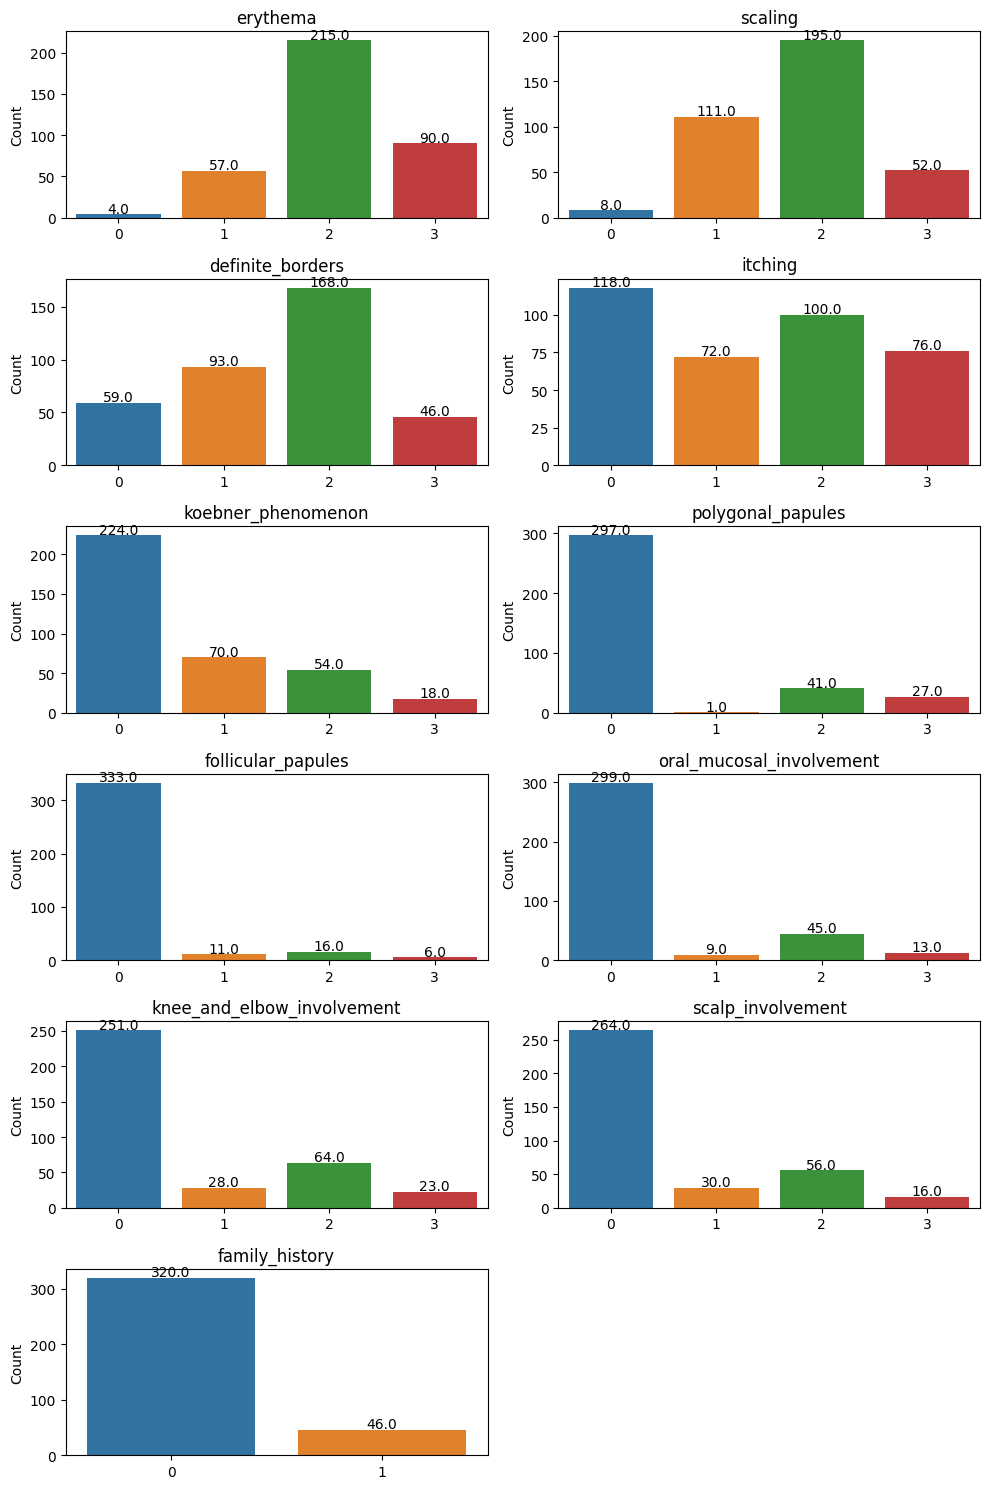

In [14]:
plt.figure(figsize=(10, 15))
plotnumber = 1

for i in df1:
    ax = plt.subplot(6, 2, plotnumber)
    sns.countplot(x=df1[i])

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

    plt.xlabel('')  # Clear the x-axis label for better appearance
    plt.ylabel('Count')  # Set a common y-axis label for all subplots
    plt.title(i, loc='center')  # Set the column name as the title at the top
    plotnumber += 1

plt.tight_layout()
plt.show()

### Insights from clinical features:  
**Erythema:** In the graph, 74.30% of people exhibit moderate-level symptoms categorized as level 1-2, while 24.50% are classified as level 3, indicating serious symptoms. The remaining 0.01% show no symptoms.  
**Scaling:** 83.60% exhibit moderate-level symptoms (level 1-2), 14.20% are classified as level 3 (serious symptoms), and 0.02% show no symptoms.  
**Definite Borders:** 71.30% exhibit moderate symptoms , 12.5% are classified as level 3 , and 16.1% show no symptoms.  
**Itching:** Moderate symptoms are exhibited by 46.90%, while 20.70% are classified as level 3 , and 32.2% show no symptoms.  
**Koebner Phenomenon Overview:** 33.80% of individuals show moderate symptoms , 4.91% are categorized with serious symptoms, and a significant majority of 61.20% display no symptoms related to Koebner Phenomenon.  
**Polygonal Papules:** 81.14% of people are not affected.  
**Follicular Papules:** 90.98% of people are not affected.  
**Oral Mucosal Involvement:** 81.69% of people are not affected, while the remaining 18.31% show symptoms.  
**Knee and Elbow Involvement:** 68.57% of people are not affected, and 25.13% are moderately affected.  
**Scalp Involvement:** 72.13% are not affected, while 23.49% are moderately affected.  
**Family History:** 87.43% of people do not have these skin issues in their family, while the remaining 12.56% do have skin problems.

Most people experience moderate effects of erythema, scaling, and definite borders, while not being affected by Koebner Phenomenon Overview, Polygonal Papules, Follicular Papules, Oral Mucosal Involvement, Knee and Elbow Involvement, Scalp Involvement, and Family History.

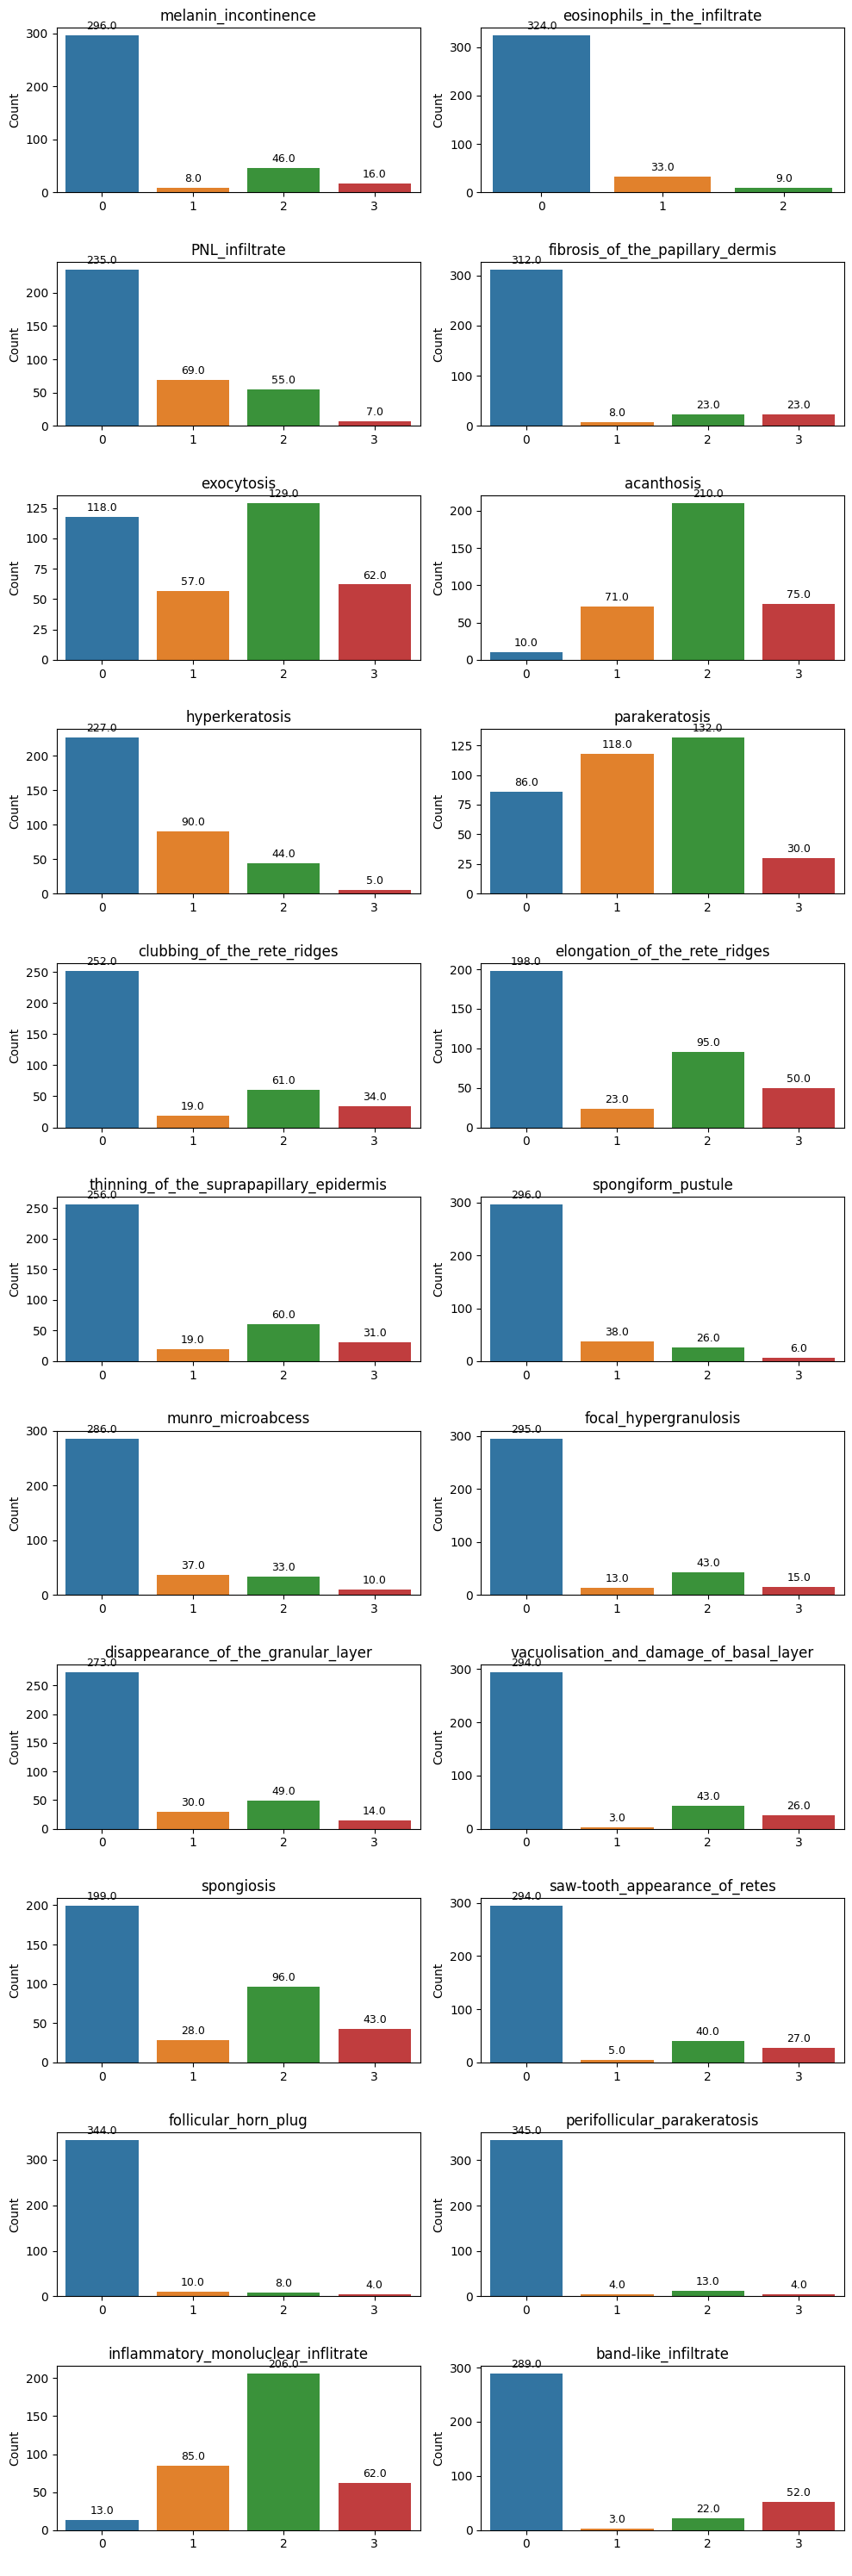

In [15]:
plt.figure(figsize=(10, 30))

plotnumber = 1
for i in df2.columns:
    plt.subplot(11, 2, plotnumber)
    ax = sns.countplot(x=df2[i])
    
    # Add count annotations on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
    plt.xlabel(" ")
    plt.ylabel('Count')
    plt.title(i, loc='center')
    
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Insights from histopathological features:


**Eosinophils in the Infiltrate:** The majority, comprising 88.5%, exhibit no effects related to eosinophils in the infiltrate. 
**PNL Infiltrate:** 64.2% of individuals are unaffected, while 33.8% experience moderate effects.  
**Fibrosis of the Papillary Dermis:** An overwhelming 85.2% of individuals show no signs of fibrosis in the papillary dermis.  
**Exocytosis:** It affects individuals in varying degrees, with 50.8% moderately affected, 32.2% unaffected, and 16.9% severely affected.  
**Acanthosis:** A significant portion, 76.7%, exhibits moderate effects of acanthosis, while 20.4% are severely affected.  
**Hyperkeratosis:** The majority, constituting 62%, show no signs of hyperkeratosis, while 36.6% are moderately affected.  
**Parakeratosis:** In terms of parakeratosis, 68.3% are moderately affected, 23.4% show no effects, and 8.1% are severely affected.  
**Clubbing of the Rete Ridges:** A significant 68.8% of individuals are unaffected, 21.8% are moderately affected, and 9.2% are severely affected by clubbing of the rete ridges.    
**Elongation of the Rete Ridges:** 54.09% of individuals show no signs, 32.2% are moderately affected, and 13.6% are severely affected.  
**Thinning of the Suprapapillary Epidermis:** 69.9% of individuals are not affected, 21.5% are moderately affected, and 8.4% are severely affected.
**Disappearance of the Granular Layer:** 74.5% of individuals are not affected, and 21.5% are moderately affected.  
**Spongiosis:** 54.3% of individuals show no signs, 33.8% are moderately affected, and 11.7% are severely affected.  
**Inflammatory Mononuclear Infiltrate:** 79.5% of individuals are moderately affected, and 16.9% are severely affected.

A large majority of individuals in the dataset, ranging from 78.1% to 94.2%, show no signs of various skin conditions, including Melanin Incontinence, Spongiform Pustule, Munro Microabcess, Focal Hypergranulosis, Vacuolisation and Damage of Basal Layer, Follicular Horn Plug, Perifollicular Parakeratosis, Saw-tooth Appearance of Rete Ridges and Band-like Infiltrate. This collective observation indicates a notable absence of these dermatological features within the studied population.


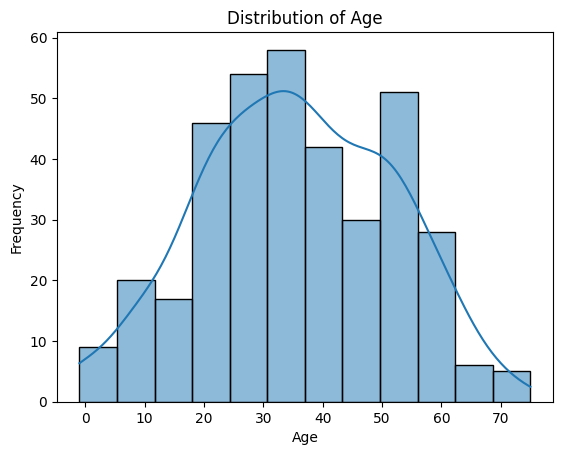

In [16]:
sns.histplot(df.Age,kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#### Insights:
The visual representation of the age distribution indicates that the majority of individuals fall within the age range of 25 to 35.

### Bivariate Analysis
* Bivariate analysis involves the analysis of two variables to understand the relationships between them. It helps to explore the interactions and associations between pairs of variables. 


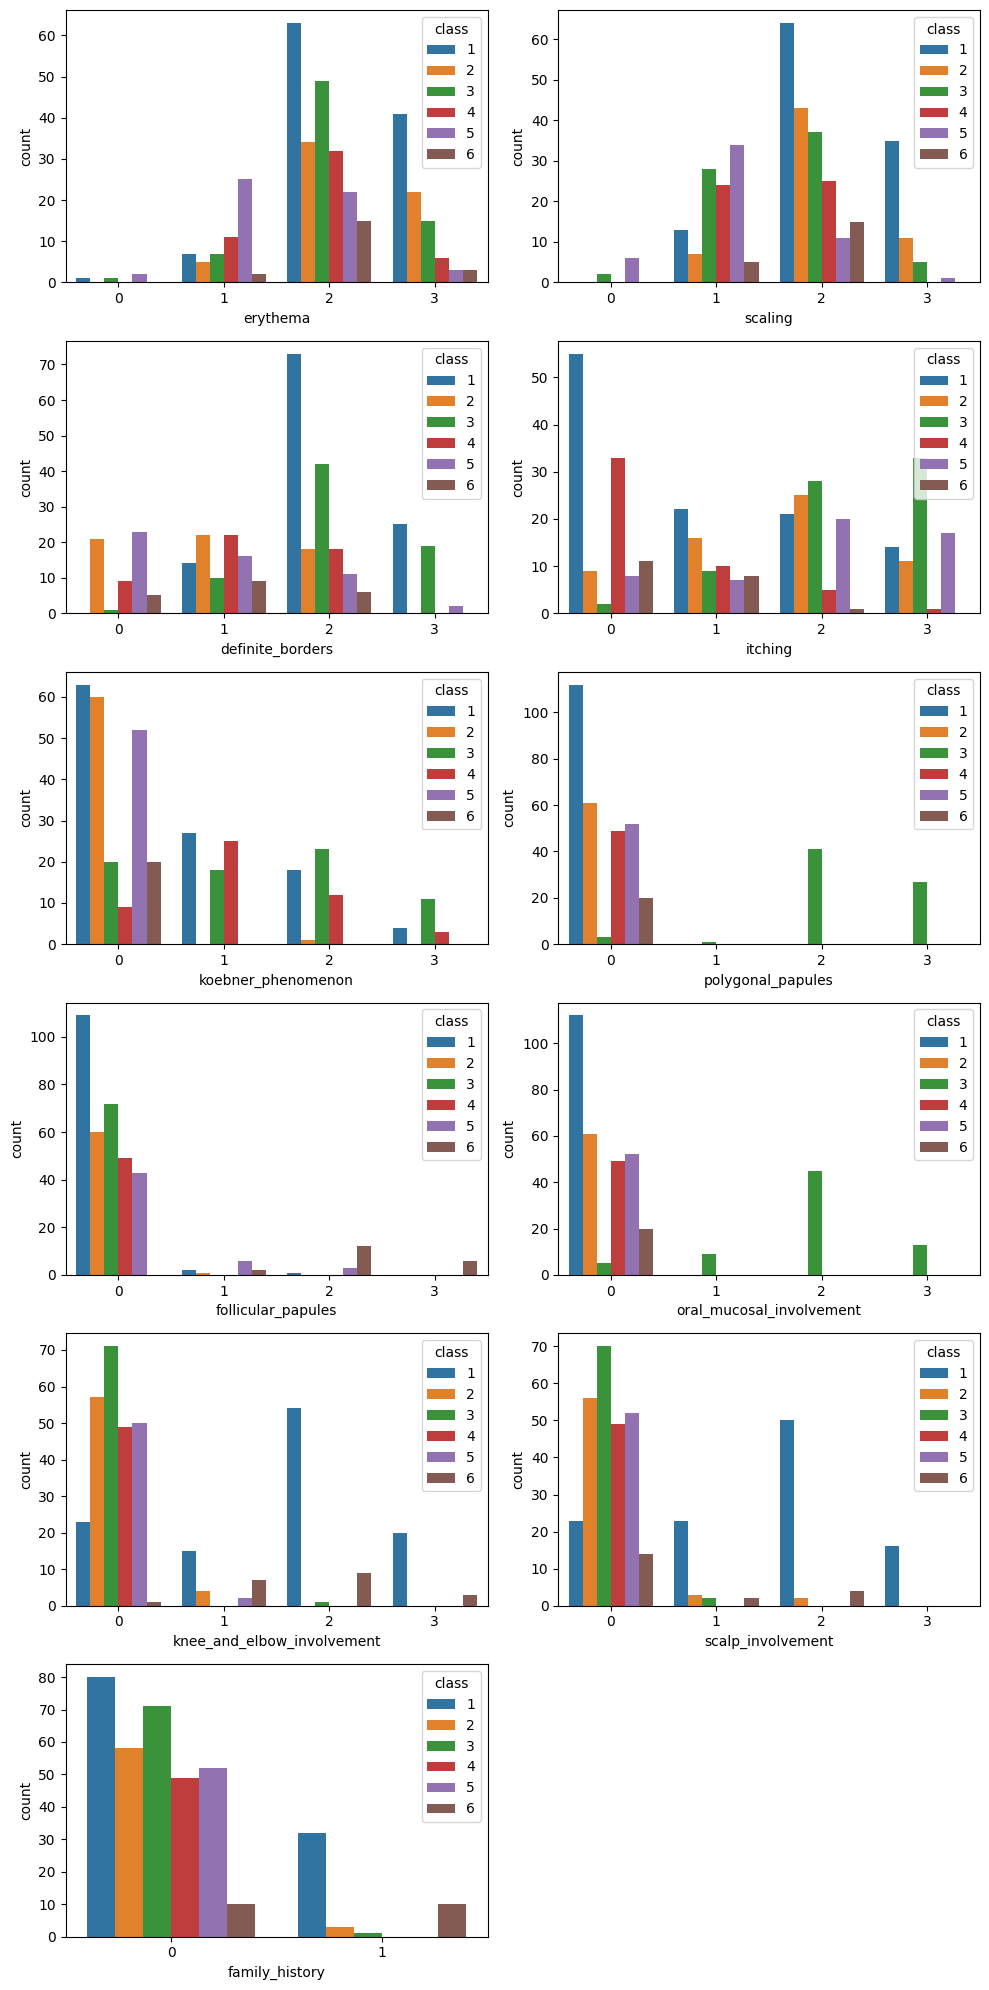

In [17]:
plt.figure(figsize=(10,20))
plotnumber=1
for i in df1:
    plt.subplot(6,2,plotnumber)
    sns.countplot(x=df1[i],hue=df['class'])
    plotnumber=plotnumber+1
plt.tight_layout()

### Insights:
* Class 1 disease is commonly associated with erythema, scaling, and scalp involvement.  
* Definite borders are prevalent in class 1, 3, and 4 diseases.  
* Itching is a common symptom across all diseases.  
* Koebner Phenomenon is notable in class 1 and 3 diseases.  
* Polygonal papules are exclusive to class 3 disease.  
* Follicular papules are visible in class 1, 5, and 6 diseases.  
* Oral mucosal involvement is specific to class 3 disease.  
* Knee and elbow involvement are common in class 1 and 6 diseases.  
* Family history of skin issues is more common in class 1 compared to class 6, 2, and 3 diseases.  

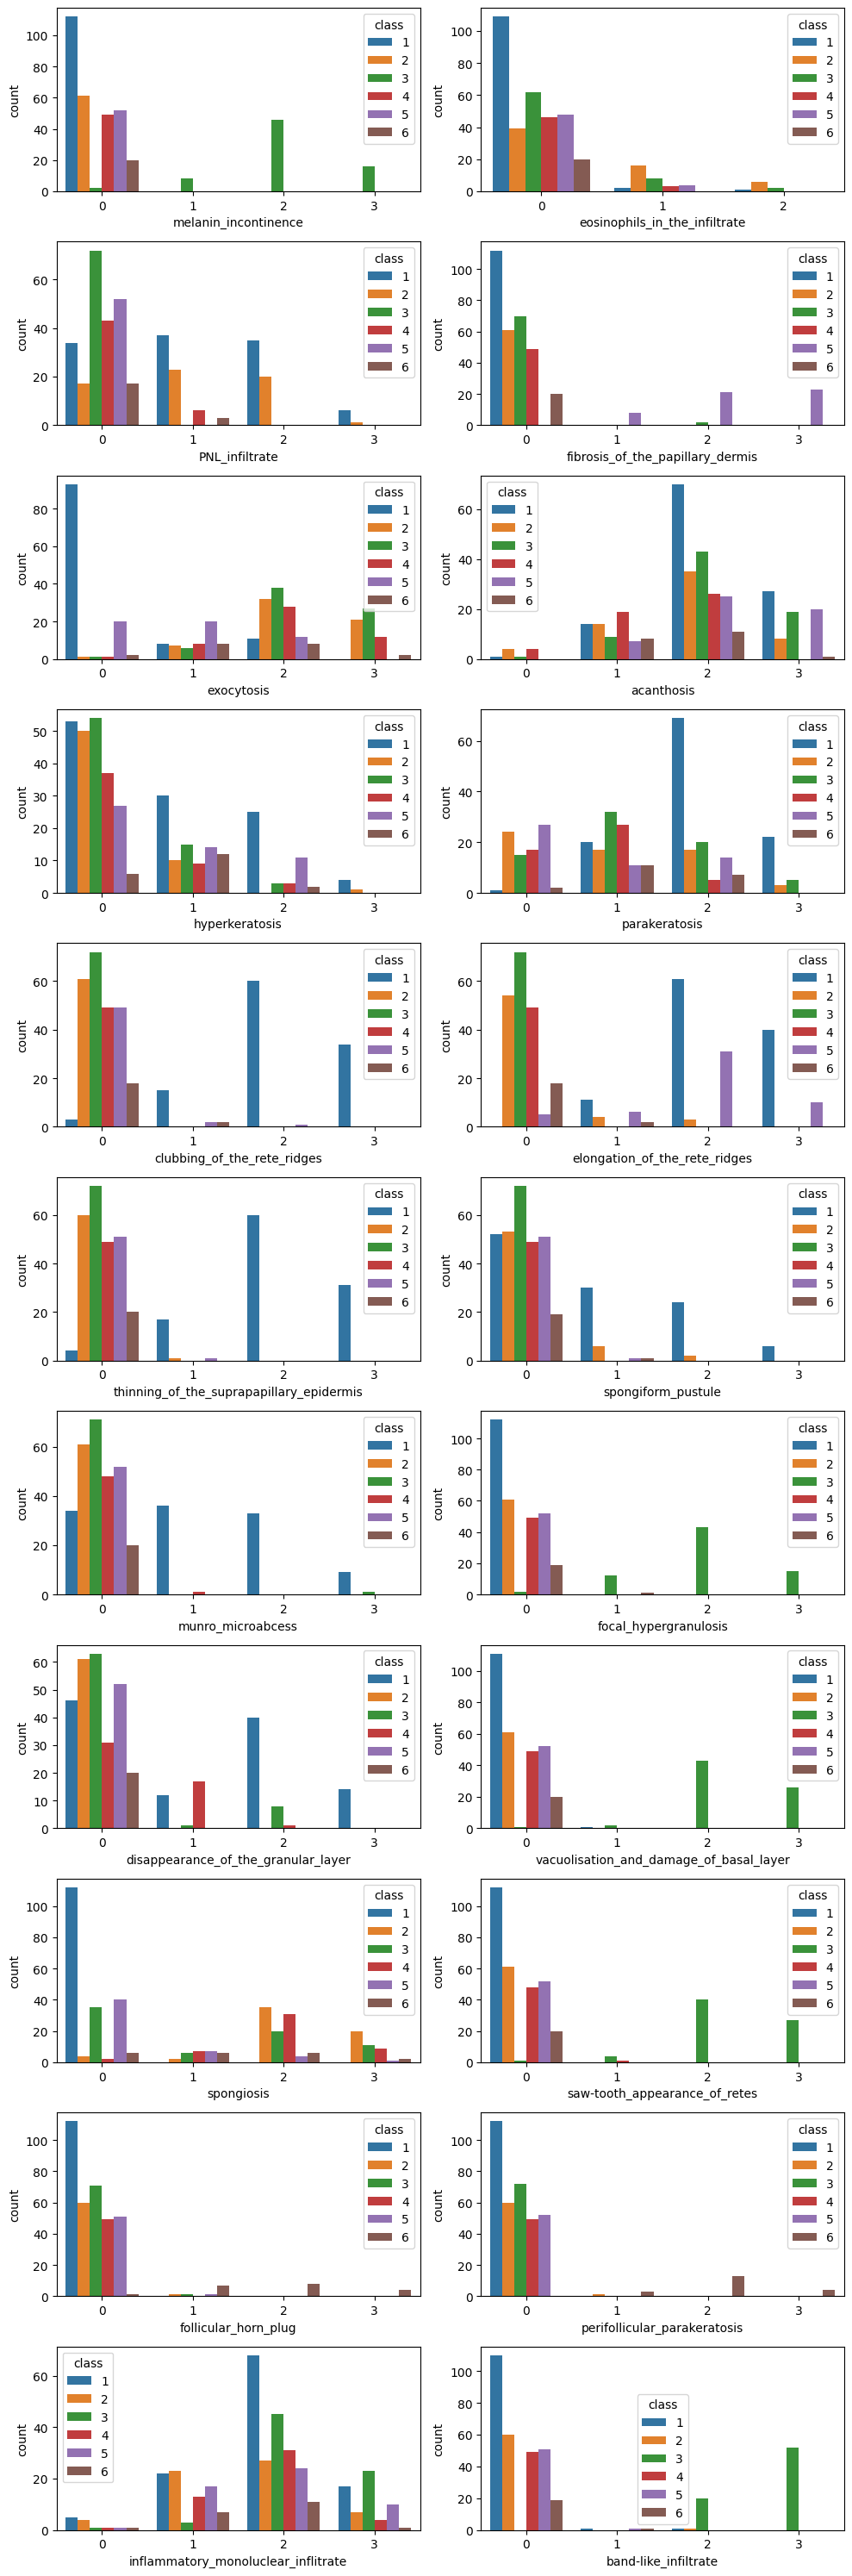

In [18]:
plt.figure(figsize=(10,30))
plotnumber=1
for i in df2:
    plt.subplot(11,2,plotnumber)
    sns.countplot(x=df2[i],hue=df['class'])
    plotnumber=plotnumber+1
plt.tight_layout()

#### Insights:
* Clubbing of the Rete Ridges, Thinning of the Suprapapillary Epidermis, and Munro Microabcess are common features in type 1.

* Focal hypergranulosis, vacuolisation and damage of basal layer, and band-like infiltrate are prevalent characteristics in type 3.

* Follicular Horn Plug and Perifollicular Parakeratosis are prevalent in type 6.


#### Insight from the overall Bivariant Analysis:
* Among various diseases, 'Type 1' exhibits the highest prevalence, surpassing other types in our dataset.

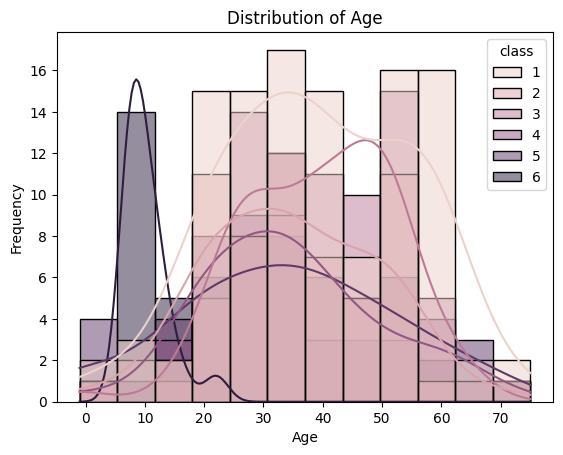

In [19]:
sns.histplot(x=df.Age,kde=True,hue=df['class'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

**Insight:**
The above graph doesn't offer meaningful observations.

### DATA PREPROCESSING

##### HANDLING WITH NULL VALUES AND CORRUPTED DATA

In [20]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

**"The dataset was found to be devoid of null values; however, the 'age' column exhibited corruption with '?' entries, later substituted with '-1'. To ensure data accuracy, we proceeded to replace the '-1' values with the median of the 'age' column.".**

In [21]:
df.loc[df.Age==-1]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,-1,1
34,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4
35,2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2
36,2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,-1,3
262,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,-1,5
263,1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,-1,5
264,1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,-1,5
265,1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,-1,5


In [22]:
df.loc[df.Age==-1,'Age']=df.Age.median()

In [23]:
#To check whether if there are any corrupted values in the data.
for i in df:
    if len(df[i].value_counts())<5:
        print(df[i].value_counts())
        print("--------------------------")
#Hence no corrupted values in the data

2    215
3     90
1     57
0      4
Name: erythema, dtype: int64
--------------------------
2    195
1    111
3     52
0      8
Name: scaling, dtype: int64
--------------------------
2    168
1     93
0     59
3     46
Name: definite_borders, dtype: int64
--------------------------
0    118
2    100
3     76
1     72
Name: itching, dtype: int64
--------------------------
0    224
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64
--------------------------
0    297
2     41
3     27
1      1
Name: polygonal_papules, dtype: int64
--------------------------
0    333
2     16
1     11
3      6
Name: follicular_papules, dtype: int64
--------------------------
0    299
2     45
3     13
1      9
Name: oral_mucosal_involvement, dtype: int64
--------------------------
0    251
2     64
1     28
3     23
Name: knee_and_elbow_involvement, dtype: int64
--------------------------
0    264
2     56
1     30
3     16
Name: scalp_involvement, dtype: int64
--------------------------
0 

**Successfully treated the corrupted data**  
**No null values and corrupted data in the dataframe**

##### HANDLING WITH OUTLIERS

**All columns in the dataset behave as categorical variables, suggesting that outlier handling is unnecessary, except for the 'Age' column.**

<Axes: >

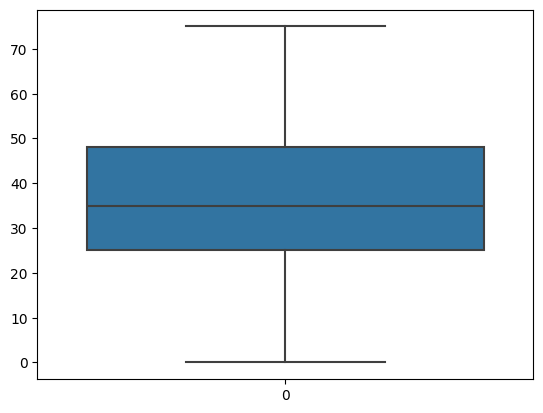

In [24]:
sns.boxplot(df.Age)


**Based on the observations from the box plot analysis, we can confidently conclude that there are no outliers present in the dataset. Consequently, we have successfully completed the outlier-handling process.**

### CONVERSION OF DATA 

**No need for the conversion of categorical data to numerical values since all columns already contain numerical data.**

###### scikit-learn allows flexibility in assigning class labels, it's often convenient to use consecutive integers starting from 0 to ensure compatibility with various functions and conventions within the library.So we are using label encoding to target column

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

### SCALING

###### Given that all columns in the dataset are categorical and their values range from 0 to 4, scaling is unnecessary for this particular dataset.

### FEATURE SELECTION

#### Feature selection is unnecessary in our case since the primary concern with feature selection typically revolves around continuous variables. In our dataset, the "age" column is the sole continuous variable, while all other columns are categorical.

### MODEL CREATION

In [28]:
#splitting the data into x and y
x=df.iloc[:,:-1]
y=df['class']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(274, 34)
(274,)
(92, 34)
(92,)


### BALANCING

#### Upon inspecting the class (output) column, it becomes evident that the dataset exhibits imbalance. To rectify this, I will employ the oversampling technique SMOTE to balance the dataset.

In [31]:
df['class'].value_counts()

0    112
2     72
1     61
4     52
3     49
5     20
Name: class, dtype: int64

Text(0.5, 1.0, 'Distribution of Categories')

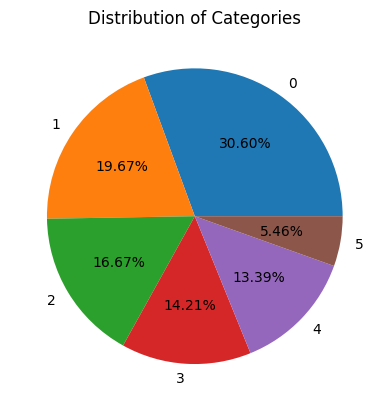

In [32]:
plt.pie(df['class'].value_counts(),labels=[0,1,2,3,4,5], autopct='%.2f%%')
plt.title('Distribution of Categories')

In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [34]:
x_sm,y_sm=sm.fit_resample(x_train ,y_train)

In [35]:
print(x_sm.shape)
print(y_sm.shape)

(468, 34)
(468,)


# Model Creation By Using Logistic_Regression

In [36]:
lr = LogisticRegression(multi_class='ovr')

In [37]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [38]:
y_pred_lr = lr.predict(x_test)

In [39]:
y_pred_lr_train = lr.predict(x_train)

In [40]:
#creating model using balanced data
lr1 = LogisticRegression(multi_class='ovr')
lr1.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr')

In [41]:
y_pred_lr_b = lr1.predict(x_test)

# Model Evaluation Logistic_Regression

In [42]:
print(" accuracy_score for balanced data :" ,accuracy_score(y_test,y_pred_lr_b))

 accuracy_score for balanced data : 0.967391304347826


In [43]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")

 accuracy_score for test data : 0.9782608695652174


In [44]:
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_lr_train)}")

 accuracy_score for train data : 0.9927007299270073


In [136]:
print("precision_score for test data:",precision_score(y_test,y_pred_lr,average='weighted'))

precision_score for test data: 0.9813664596273292


In [138]:
print("recall_score for test data:",recall_score(y_test,y_pred_lr,average='weighted'))

recall_score for test data: 0.9782608695652174


In [45]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



In [46]:
print(f"classification_report for train data : {classification_report(y_train,y_pred_lr_train)}")

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      0.96      0.98        49
           2       1.00      1.00      1.00        55
           3       0.95      1.00      0.97        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        16

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274



**We have observed that our models perform better when trained on imbalanced data compared to balanced data. Therefore, we have decided to utilize imbalanced data for the subsequent algorithms, as it yields more favorable outcomes.**

# Model Creation by using KNN-Classifier

In [47]:
# Running the model with different nearest neighbours number to check which will gives us least error rate
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i)
    knn1.fit(x_train,y_train)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

[8.695652173913043, 10.869565217391305, 15.217391304347828, 19.565217391304348, 23.91304347826087, 22.82608695652174, 26.08695652173913, 25.0, 23.91304347826087, 29.347826086956523]


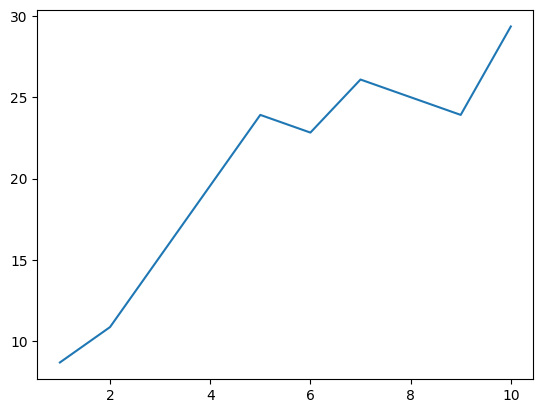

In [162]:
# plotting to check the nearest neighbours with least error rate
plt.plot(range(1,11),err_rate)
plt.show()

In [49]:
knn = KNeighborsClassifier(5)

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred_knn = knn.predict(x_test)

In [52]:
y_pred_knn_train = knn.predict(x_train)

# Model Evaluation KNN - Classifier

In [53]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_knn_train)}")

 accuracy_score for test data : 0.7608695652173914
 accuracy_score for train data : 0.9306569343065694


In [54]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_knn_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      0.88      0.94        34
           1       0.46      0.50      0.48        12
           2       1.00      1.00      1.00        17
           3       0.35      0.55      0.43        11
           4       0.80      0.57      0.67        14
           5       0.60      0.75      0.67         4

    accuracy                           0.76        92
   macro avg       0.70      0.71      0.70        92
weighted avg       0.80      0.76      0.78        92

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.85      0.84      0.85        49
           2       1.00      1.00      1.00        55
           3       0.73      0.87      0.80        38
           4       1.00      0.87      0.93        38
           5       1.00      1.00      1.00        16



In [140]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

precision_score for test data: 0.804574070430848


In [139]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

recall_score for test data: 0.7608695652173914


**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

# Hyperparameter Tuning - KNN

In [55]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

In [56]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [57]:
grid_search.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [58]:
best_knn_model = grid_search.best_estimator_

In [59]:
knn_pred = best_knn_model.predict(x_test)

In [60]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of the Best Model:", accuracy)

Accuracy of the Best Model: 0.9239130434782609


In [141]:
print("precision_score for test data:",precision_score(y_test, knn_pred,average='weighted'))

precision_score for test data: 0.9328416149068323


In [142]:
print("recall_score for test data:",recall_score(y_test, knn_pred,average='weighted'))

recall_score for test data: 0.9239130434782609


# Model creation by using SVM-Classifier

In [61]:
svc = SVC()

In [62]:
svc.fit(x_train,y_train)

SVC()

In [63]:
y_pred_svc = svc.predict(x_test)

In [64]:
y_pred_svc_train = svc.predict(x_train)

# Model Evaluation SVM - Classifier

In [65]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_svc_train)}")

 accuracy_score for test data : 0.7065217391304348
 accuracy_score for train data : 0.7335766423357665


In [143]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

precision_score for test data: 0.5930393308909933


In [144]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

recall_score for test data: 0.7065217391304348


In [66]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_svc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.35      1.00      0.52        12
           2       1.00      1.00      1.00        17
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        14
           5       0.75      0.75      0.75         4

    accuracy                           0.71        92
   macro avg       0.50      0.62      0.53        92
weighted avg       0.59      0.71      0.63        92

classification_report for train data :               precision    recall  f1-score   support

           0       0.90      0.96      0.93        78
           1       0.44      0.94      0.60        49
           2       1.00      1.00      1.00        55
           3       0.00      0.00      0.00        38
           4       1.00      0.24      0.38        38
           5       0.70      1.00      0.82        16



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

# Hyperparameter Tuning - SVM

In [67]:
svm_param_grid=param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1],
}


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
svm_grid_search = GridSearchCV(svc, svm_param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

In [70]:
svm_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=2)

In [71]:
svm_grid_search.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [72]:
svm_grid_search.best_estimator_

SVC(C=0.1, gamma=0.001, kernel='linear')

In [1]:
svm_best_model=SVC(C=0.1, gamma=0.001, kernel='linear')

NameError: name 'SVC' is not defined

In [74]:
svm_best_model.fit(x_train,y_train)

SVC(C=0.1, gamma=0.001, kernel='linear')

In [75]:
svm_pred = svm_best_model.predict(x_test)
svm_pred_train  = svm_best_model.predict(x_train )

# Model evaluation SVM

In [76]:
print(f" accuracy_score for test data : {accuracy_score(y_test,svm_pred)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,svm_pred_train)}")

 accuracy_score for test data : 0.9565217391304348
 accuracy_score for train data : 0.9854014598540146


In [145]:
print("precision_score for test data:",precision_score(y_test,svm_pred,average='weighted'))

precision_score for test data: 0.9630434782608696


In [146]:
print("recall_score for test data:",recall_score(y_test,svm_pred,average='weighted'))

recall_score for test data: 0.9565217391304348


In [77]:
print(f"classification_report for test data : {classification_report(y_test,svm_pred)}")
print(f"classification_report for train data : {classification_report(y_train,svm_pred_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       0.75      0.75      0.75         4

    accuracy                           0.96        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.96      0.96      0.96        92

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       0.96      0.96      0.96        49
           2       1.00      1.00      1.00        55
           3       0.95      0.95      0.95        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        16



# Model Creation By Using Decision Tree Classifier

In [78]:
dtc = DecisionTreeClassifier()

In [79]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred_dtc= dtc.predict(x_test)

In [81]:
y_pred_dtc_train=dtc.predict(x_train)

# Model Evaluation Decision Tree

In [159]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_dtc_train)}")

 accuracy_score for test data : 0.9782608695652174
 accuracy_score for train data : 1.0


In [147]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.9794772256728778


In [148]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.9782608695652174


In [83]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_dtc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      1.00      1.00        12
           2       1.00      0.94      0.97        17
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00        14
           5       1.00      0.75      0.86         4

    accuracy                           0.98        92
   macro avg       0.98      0.95      0.96        92
weighted avg       0.98      0.98      0.98        92

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        16



**No need of hyperparametertuning as we are satisfied with the evaluation scores.**

# Model creation by using Random Forest Classifier

In [84]:
rfc=RandomForestClassifier()

In [85]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred_rfc=rfc.predict(x_test)

In [87]:
y_pred_rfc_train = rfc.predict(x_train)

# Model Evaluation Random Forest Classifier

In [88]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_rfc_train)}")

 accuracy_score for test data : 0.9782608695652174
 accuracy_score for train data : 1.0


In [149]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.9813664596273292


In [150]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.9782608695652174


In [89]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_rfc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        16



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

# HyperParmeterTuning - Random Forest

In [90]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [91]:
random_search = RandomizedSearchCV(rfc, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [92]:
# Fit the model
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42)

In [93]:
best_model = random_search.best_estimator_

In [94]:
rfc_pred = best_model.predict(x_test)
rfc_pred_train = best_model.predict(x_train)

# Model Evaluation - Random Forest

In [95]:
print(f" accuracy_score for test data : {accuracy_score(y_test,rfc_pred)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,rfc_pred_train)}")

 accuracy_score for test data : 0.9565217391304348
 accuracy_score for train data : 0.9817518248175182


In [151]:
print("precision_score for test data:",precision_score(y_test,rfc_pred,average='weighted'))

precision_score for test data: 0.9633540372670808


In [152]:
print("recall_score for test data:",recall_score(y_test,rfc_pred,average='weighted'))

recall_score for test data: 0.9565217391304348


In [96]:
print(f"classification_report for test data : {classification_report(y_test,rfc_pred)}")
print(f"classification_report for train data : {classification_report(y_train,rfc_pred_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        17
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00        14
           5       1.00      0.75      0.86         4

    accuracy                           0.96        92
   macro avg       0.96      0.91      0.93        92
weighted avg       0.96      0.96      0.96        92

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       0.91      1.00      0.95        49
           2       1.00      1.00      1.00        55
           3       1.00      0.87      0.93        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        16



# By using bagging base estimator is Decision Tree

In [97]:
model_bagg = BaggingClassifier(base_estimator=dtc, n_estimators=30,random_state=15)

model_bagg.fit(x_train,y_train)

y_pred_bagg = model_bagg.predict(x_test)

In [98]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_bagg)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,rfc_pred_train)}")

 accuracy_score for test data : 0.9891304347826086
 accuracy_score for train data : 0.9817518248175182


In [153]:
print("precision_score for test data:",precision_score(y_test,y_pred_bagg,average='weighted'))

precision_score for test data: 0.9894409937888199


In [154]:
print("recall_score for test data:",recall_score(y_test,y_pred_bagg,average='weighted'))

recall_score for test data: 0.9891304347826086


In [99]:
from xgboost import XGBClassifier
xgc=XGBClassifier() 
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [100]:
y_pred_xgc = xgc.predict(x_test)

In [101]:
y_pred_xgc_train= xgc.predict(x_train)

# Model Evaluation XGBoost Classifier

In [102]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_xgc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_xgc_train)}")

 accuracy_score for test data : 0.967391304347826
 accuracy_score for train data : 1.0


In [155]:
print("precision_score for test data:",precision_score(y_test,y_pred_xgc,average='weighted'))

precision_score for test data: 0.9739130434782608


In [156]:
print("recall_score for test data:",recall_score(y_test,y_pred_xgc,average='weighted'))

recall_score for test data: 0.967391304347826


In [103]:
# classification report for test data 
print(f"classification_report for test data : {classification_report(y_test,y_pred_xgc)}")
# classification report for train data 
print(f"classification_report for train data : {classification_report(y_train,y_pred_xgc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        17
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        16



In [104]:
y_pred_xgc = xgc.predict(x_test)

y_pred_xgc_train= xgc.predict(x_train)

# Model Evaluation XGBoost Classifier

print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_xgc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_xgc_train)}")

# classification report for test data 
print(f"classification_report for test data : {classification_report(y_test,y_pred_xgc)}")
# classification report for train data 
print(f"classification_report for train data : {classification_report(y_train,y_pred_xgc_train)}")

 accuracy_score for test data : 0.967391304347826
 accuracy_score for train data : 1.0
classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        17
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        38
           4       1.0

**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

# Hyperparameter Tuning-Xgboost

In [105]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [106]:
random_search = RandomizedSearchCV(xgc, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [107]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42)

In [108]:
best_model = random_search.best_estimator_
xgb_pred = best_model.predict(x_test)
xgb_pred_train = best_model.predict(x_train)

# Model Evaluation XGBoost Classifier

In [109]:
print(f" accuracy_score for test data : {accuracy_score(y_test,xgb_pred)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,xgb_pred_train)}")

 accuracy_score for test data : 0.967391304347826
 accuracy_score for train data : 0.9781021897810219


In [157]:
print("precision_score for test data:",precision_score(y_test,xgb_pred,average='weighted'))

precision_score for test data: 0.9739130434782608


In [158]:
print("recall_score for test data:",recall_score(y_test,xgb_pred,average='weighted'))

recall_score for test data: 0.967391304347826


In [110]:
# classification report for test data after Hyperparameter Tuning
print(f"classification_report for test data : {classification_report(y_test,xgb_pred)}")
# classification report for train data after Hyperparameter Tuning
print(f"classification_report for train data : {classification_report(y_train,xgb_pred_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        17
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       0.94      0.96      0.95        49
           2       1.00      0.98      0.99        55
           3       0.97      0.92      0.95        38
           4       0.97      1.00      0.99        38
           5       0.94      1.00      0.97        16



# Conclusions

In [111]:
models=['LogisticRegression','K Nearest Neighbors','SVM','Decision Tree','Random Forest','Bagging','xgboost']
accuracy_scores=[ accuracy_score(y_test,y_pred_lr),accuracy_score(y_test, knn_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test,y_pred_dtc),accuracy_score(y_test,rfc_pred),accuracy_score(y_test,y_pred_bagg),accuracy_score(y_test,xgb_pred)]

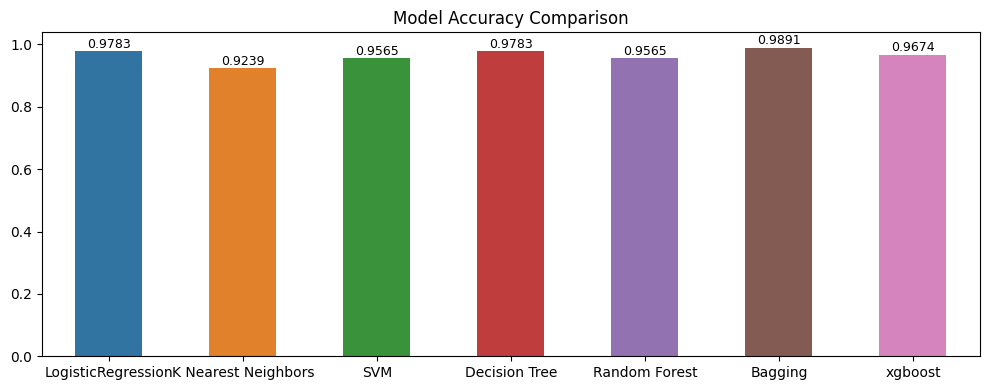

In [161]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5)
plt.title('Model Accuracy Comparison')

# Add labels to the top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Model Comparison Report:  
**LogisticRegression Model:**  
Accuracy_score : 0.9782608695652174  
Precision_score: 0.9813664596273292  
Recall_score   :0.9782608695652174  
* Logistic regression is known for its simplicity and interpretability, making it easy to understand and implement.  

**K Nearest Neighbors Classifier Model:**  
Accuracy_score : 0.9239130434782609  
Precision_score:0.9328416149068323    
Recall_score   :0.9239130434782609  
* KNN is able to handle  the non-linear relationships in data without making strong assumptions.  

**SVM Classifier Model:**  
Accuracy_score : 0.9565217391304348   
Precision_score:0.9630434782608696  
Recall_score: 0.9565217391304348  
* SVM's are effective in high-dimensional spaces and can handle non-linear relationships.  

**Decision Tree Classifier Model:**  
Accuracy_score :0.9782608695652174    
Precision_score:0.9794772256728778  
Recall_score:0.9782608695652174   
* Decision trees may be prone to overfitting, and their interpretability is a strength.  

**Random Forest Classifier Model:**  
Accuracy_score :0.9782608695652174    
Precision_score:0.9633540372670808  
Recall_score:0.9565217391304348  
* Random Forests are an ensemble method known for handling complex relationships and reducing overfitting.  

**Bagging using Decision Tree Classifier:**  
Accuracy_score 0.9891304347826086  
Precision_score:0.9894409937888199  
Recall_score:0.9891304347826086   

* Bagging reduces overfitting and improves model robustness,enhancing the generalization performance of the model.    

**XGBoost Classifier:**  
Accuracy_score :0.967391304347826  
Precision_score:0.9739130434782608  
Recall_score:0.967391304347826  
* XGBoost is a powerful boosting algorithm known for its efficiency and performance.








### Result:
* Among various models  Bagging using Decision Tree stand out as the most suitable models for this dataset.

### Challenges Faced:  
**Challenge:** When working with the age column in the dataset, we initially overlooked its datatype, which was set as an object. Consequently, this oversight led to an inaccurate representation in the histogram plot, impacting our ability to obtain meaningful insights from the data.  
**Solution:** We addressed the issue of corrupted values ('?') in the dataset by replacing them with '-1'. Additionally, to ensure data consistency, we converted the age column to integer type.